# Introduction
During the year between May 2014 and May 2015, over 20,000 homes were bought and sold in King County, the most populous county in Washingon state.  The most notable city is Seattle, which in 2015 had a population of about 675,000.  The local government collected data from home purchases and made these data available on their website. This notebook discusses a method for predicting home prices using the nineteen features found in the King County public dataset.  

The data in this notebook was aquired on Kaggle.com, and required no cleaning or pre-processing.  

It's found that the greatest factors in the price of a home in King County include: total living square footage, condition, number of bedrooms, grade, whether it is situated on the waterfront, and in some cases it's zipcode, latitude and longitude.  The resulting model is 83.87% accurate at predicting home prices. 


# Data
The King County Housing Dataset was scraped from King County's public data portal and posted to the data website Kaggle.com by user harlfoxem. It can be found at this link: https://www.kaggle.com/harlfoxem/housesalesprediction/data. Before sharing the data on Kaggle, user hrlfoxem cleaned it to provide users a smooth entry into practicing linear regression techniques.  The dataset has nineteen features, plus the date sold and unique id for each home.  The features are as follows:

|Feature Name|Description|
|-|
|id|unique home identifier|
|date|date house was sold|
|price|price is prediction target|
|bedrooms|number of bedrooms|
|bathrooms|number of bathrooms|
|sqft_living|square footage of the home|
|sqft_lot|square footage of the lot|
|floors|total floors (levels in house|
|waterfront|indicates whether the home is positioned on the water|
|view|indicates whether the home has been viewed|
|condition|rating of the overall condition of the home|
|grade|overall grade given to the housing unit based on King County grading system|
|sqft_above|square footage of house apart from basement|
|sqft_basement|square footage of the basement|
|yr_built|year the home was built|
|yr_renovated|year the home was renovated|
|zipcode|zipcode the home resides in|
|lat|latitude coordinate|
|long|longitude coordinate|
|sqft_living15|living room area in 2015 (implies some renovations) -this might or might not have affected the lotsize area|
|sqft_lot15|lot size area in 2015 (implies some renovations)|

# Methods
### K-Means Clustering
Houses that are priced similarly have similar characteristics.  K-Means Clustering gives us the opportunity to group homes according to like features to maximize the accuracy of the predictive model.  In K-Means Clustering, the distance between centroids is maximized, and the distance between data points and their respective centroid is minimized. Before fitting our model, the data is clustered based on three features: price, total square footage, and grade, a rating applied to the quality of the home.  

### Feature Encoding
To improve the predictive power of the model and eliminate some of the variability observed in certain features, a grouping may be applied to each observation to place each home into intervals, or buckets, of similarly priced homes.  After each observation is in it's respective bucket, we calculate the average price of the homes in each bucket, and then assign that average value to a new column in the dataframe.  If a linear relationship emerges between these encoded variables and the price of homes, we can use this as a new feature. 

For example, when I encode the feature 'sqft_living', each home will be grouped into 30 equally populated buckets corresponding to their square footage.  I'll calculate the average price of the homes in each bucket, and it will be assigned to a new feature, which can be used to predict the price of new homes, based on which square-footage-bucket they belong to. 

### Multiple Linear Regression
[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. Multiple linear regression contains multiple independent variables.

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 

The mean absolute percentage error (MAPE) is a measure of prediction accuracy.  It is calculated using the following formula:

$$M = \frac{100\%}{n}\sum_{t = 1}^{n}\left | \frac{A_{t} - F_{t}}{A_{t}} \right |$$

where $A_{t}$ is the actual value and $F_{t}$ is the predicted value.

# Analysis
Through exploring the data visually, it was found that home prices are skewed to the right.  The median home price is $450,000.  The features that show the strongest positive relationship with price include the total living square footage, condition, number of bedrooms, grade, whether it is situated on the waterfront, and in some cases it's zipcode, latitude and longitude.  The visualizations below show these. Also notable is the effect of having the home renovated and whether it has been viewed.  Having your home viewed seems to increase it's value, although this is almost undoubtedly non-causal.  It's most likely that it's just a consequence of the fact that the lowest priced homes tend to be in worse condition and would appeal to far fewer potential buyers. 

### Model Results

| __NO FEATURE ENCODING__|MAPE|
|:-|
|All Features - no Clustering|__25.84%__|
|Cluster 0 | 18.97% |
|Cluster 1 | 13.25% |
|Cluster 2 | 18.12% |
|Avg Clusters | __16.78%__ |
|__Improvement__ | __9.06%__ |

|__USING ENCODED FEATURES__ |MAPE|
|:-|
|All Features - no Clustering|__25.84%__|
|Cluster 0 | 17.36% | 
|Cluster 1 | 13.12% |
|Cluster 2 | 17.91% |
|Avg Clusters | __16.13%__ |
|__Improvement__ | __9.71%__|

Clustering improves the accuracy of our model by 9.06%, and feature encoding extends it further by 0.69%.


# Conclusion
Our model predicts home prices in King Count, Washington with 83.87% accuracy.  When predicting home prices, users should be aware that the greatest influencer on price is square footage.  

Homes that have a larger square footage, larger price, and have a grade rating between 8-12 are more difficult to predict, and whether they are on the waterfront has a large impact on the pricing of the home.  Middle range homes, as rated by price, square footage and grade, can be estimated with the least amount of error.  An interesting note is that this grouping seems to be the group in which zipcode, latitude, and longitude have the greatest impact.  This could be a coincidence specific to this region, and would be a point to investigate further.  The lowest rated homes have prices motivated by the most pracical factors: square footage, bedrooms, bathrooms, and condition.  

The limitations of this report are that the data is aquired in a small geographical region during a small time period.  Predictions outside of these bounds would not be appropriate.     

### Code


In [67]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.ticker as mtick
import seaborn as sns

df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [68]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [69]:
# iterate over rows checking for any missing values 
sum([True for idx,row in df.iterrows() if any(row.isnull())])

0

There are no rows with missing values.

In [70]:
df.shape

(21613, 21)

At this time, we have determined that the data needs no more pre-processing. 21,613 different home purchases are available to use in our model. Lets start with a look at the distribution of home prices.

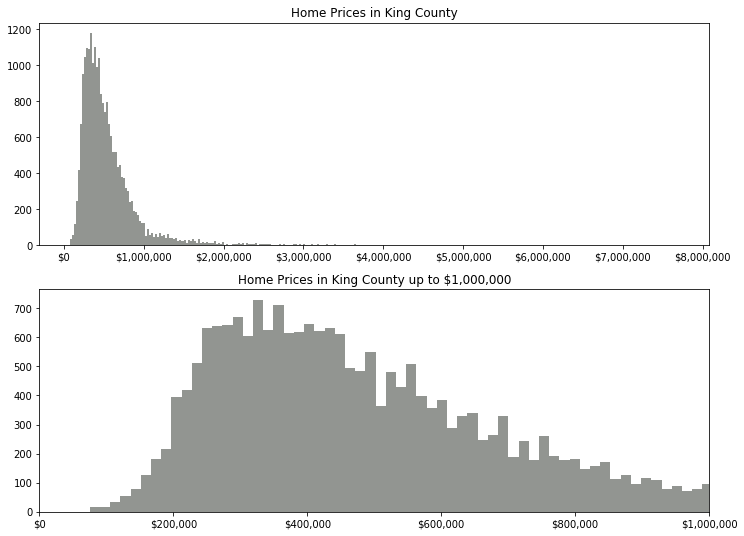

In [71]:
#investigate price column 
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)

fig = plt.figure(figsize=(12, 9))

ax1 = fig.add_subplot(2,1,1)
ax1.hist(df.price, bins = 300, color = 'xkcd:grey')
ax1.set_title("Home Prices in King County")
ax1.xaxis.set_major_formatter(tick) 

ax2 = fig.add_subplot(2,1,2)
ax2.hist(df.price, bins = 500, color = 'xkcd:grey')
ax2.set_xlim(0,1000000)
ax2.set_title("Home Prices in King County up to $1,000,000")
ax2.xaxis.set_major_formatter(tick) 

plt.show()


A correlation matrix is a figure that allows us to see the relationship between each of the features in our dataset.  The sns heatmap() function allows us to visaualize with color those variables that are highly correlated to each other.  We'll be focusing specifically on the correlates to price. 

In [72]:
print(df.corr()['price'].sort_values(ascending = False)[1:11])

sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
Name: price, dtype: float64


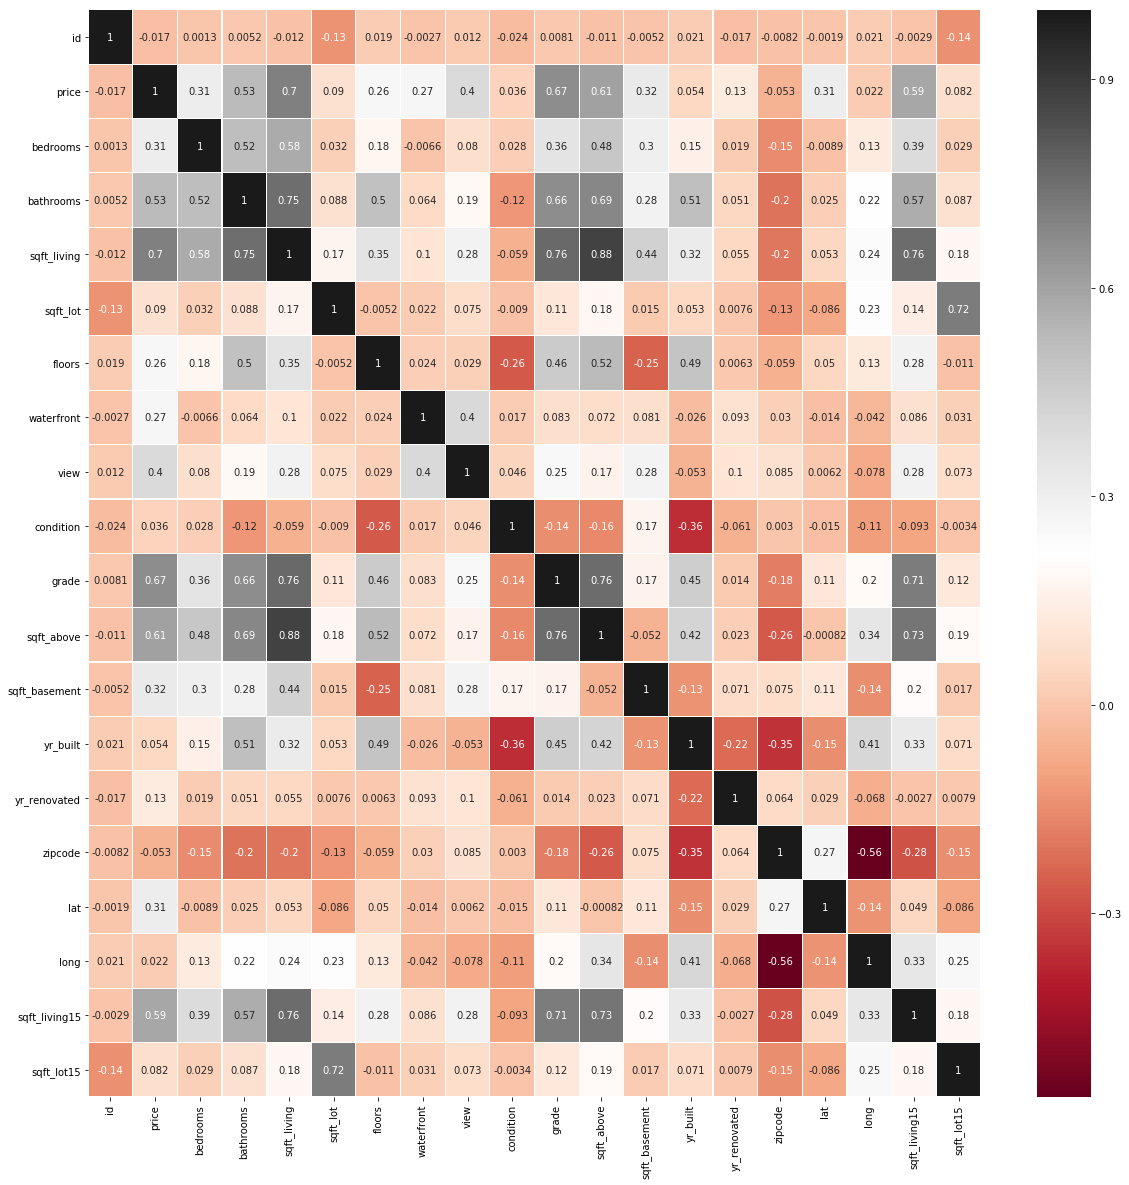

In [73]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(),cmap='RdGy',linewidths=0.1,linecolor='white',annot=True)
plt.show()

The top correlates to home price are:

Feature | Correlation
--- | ---
sqft_living | 0.70 <br>
grade | 0.67<br>
sqft_above | 0.61<br>
sqft_living15 | 0.59<br>
bathrooms | 0.53<br>
view | 0.40<br>

There are also strong correlations between the variables that have to do with square footage.  For example, a home with a large square footage is likely to also have a large value for 
square footage upstairs and downstairs.  Also, the number of bedrooms is positively correlated to square footage values.  

Below are scatterplots for each of the top correlates.

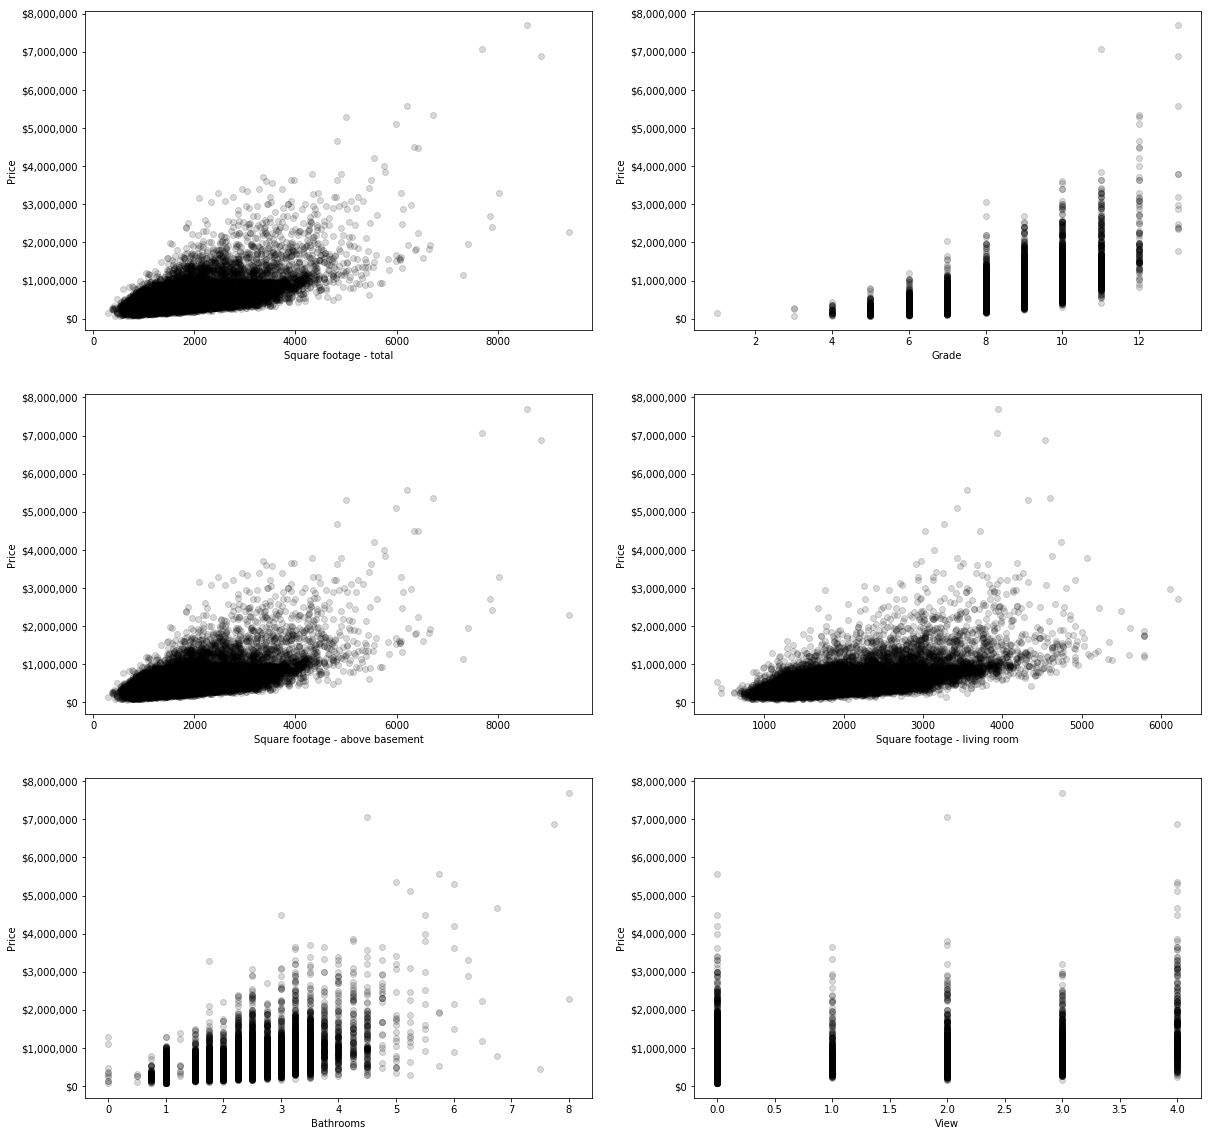

In [74]:
fig = plt.figure(figsize = (20,20))
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
#fig.yaxis.set_major_formatter(tick) 

ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)

#plot price vs sqft_living
ax1.scatter(df.sqft_above,df.price, c = 'xkcd:black', alpha = .15)
ax1.set_xlabel('Square footage - total')
ax1.set_ylabel('Price')
ax1.yaxis.set_major_formatter(tick) 

#plot price vs grade
ax2.scatter(df.grade,df.price, c = 'xkcd:black', alpha = .15)
ax2.set_xlabel('Grade')
ax2.set_ylabel('Price')
ax2.yaxis.set_major_formatter(tick) 

#plot price vs sqft_above
ax3.scatter(df.sqft_above,df.price, c = 'xkcd:black', alpha = .15)
ax3.set_xlabel('Square footage - above basement')
ax3.set_ylabel('Price')
ax3.yaxis.set_major_formatter(tick) 

#plot price vs sqft_living15
ax4.scatter(df.sqft_living15,df.price, c = 'xkcd:black', alpha = .15)
ax4.set_xlabel('Square footage - living room')
ax4.set_ylabel('Price')
ax4.yaxis.set_major_formatter(tick) 

#plot price vs bathrooms
ax5.scatter(df.bathrooms,df.price, c = 'xkcd:black', alpha = .15)
ax5.set_xlabel('Bathrooms')
ax5.set_ylabel('Price')
ax5.yaxis.set_major_formatter(tick) 

#plot price vs view
ax6.scatter(df.view,df.price, c = 'xkcd:black', alpha = .15)
ax6.set_xlabel('View')
ax6.set_ylabel('Price')
ax6.yaxis.set_major_formatter(tick) 

plt.show()

 Each of the square footage metrics have a weak linear relationship.  The grade and bathrooms features have significant variance depending on each discrete value, and the view seems to not be a good linear fit. 

### Visualizing the Effect of Renovations, Waterfront, and Whether the Home is Viewed

C:\Users\BradT\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


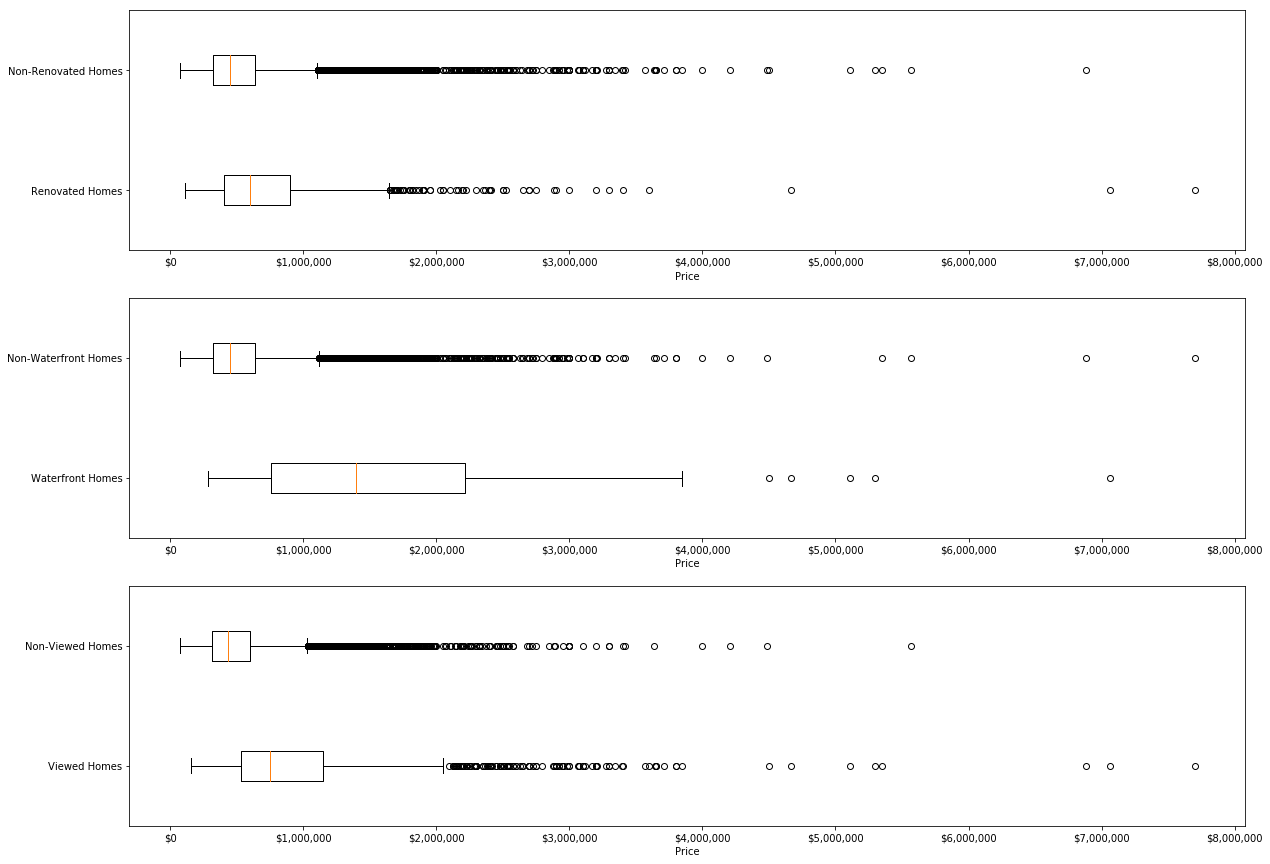

In [75]:
fig = plt.figure(figsize = (20,15))

renovated = df[df['yr_renovated'] > 0]
not_renovated = df[df['yr_renovated'] <= 0]
to_plot_renovated = [renovated.price, not_renovated.price]
ax1 = fig.add_subplot(3,1,1)
ax1.set_xlabel("Price")
ax1.xaxis.set_major_formatter(tick) 
plt.boxplot(to_plot_renovated, vert = False, widths = .25,labels = ['Renovated Homes','Non-Renovated Homes'])

waterfront = df[df['waterfront'] > 0]
not_waterfront = df[df['waterfront'] <= 0]
to_plot = [waterfront.price, not_waterfront.price]
ax2 = fig.add_subplot(3,1,2)
ax2.set_xlabel("Price")
ax2.xaxis.set_major_formatter(tick)
plt.boxplot(to_plot, vert = False, widths = .25,labels = ['Waterfront Homes','Non-Waterfront Homes'])

view = df[df['view'] > 0]
not_view = df[df['view'] <= 0]
to_plot = [view.price, not_view.price]
ax3 = fig.add_subplot(3,1,3)
ax3.set_xlabel("Price")
ax3.xaxis.set_major_formatter(tick) 
plt.boxplot(to_plot, vert = False, widths = .25,labels = ['Viewed Homes','Non-Viewed Homes'])
plt.show()

Homes that have been renovated tend to have a higher value.  Seventy-five percent of non-renovated homes are less expensive than half of all renovated homes. Homes on the waterfront tend to be much more expensive.  A full seventy-five percent of non-waterfront homes are less expensive than the cheapest quarter of all homes on the waterfront. Homes that have not been viewed tend to be less valuable than viewed homes. 

# Linear regression model

In [76]:
# import packages
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.regressionplots import *
from scipy import stats

# this function returns the mean absolute percentage error between predicted and actual values
def mean_absolute_percentage_error(y_test, y_pred):
    # return the MAPE score
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# this function performs linear regression on a data set
# input: data and target
def make_linear_model(X, y, plot = True):
    # create train and test sets with 70/30 split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 23)
    
    # fit the train data and create predictions with test data
    reg = linear_model.LinearRegression()
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    
    # create dataframe with features and coefficients
    results = pd.DataFrame({'Features': X.columns, 'Estimated Coefficients': reg.coef_})[['Features', 'Estimated Coefficients']]
    
    # print results and summary statistics
    print(results)
    print('\nEstimated intercept coefficient: {}'.format(reg.intercept_))    
    print('\nSummary Statistics\nR-squared value: {}'.format(reg.score(X_test, y_test)))
    print("Root Mean Squared Error: {}".format(np.sqrt(mean_squared_error(y_test,y_pred))))
    print("Mean Absolute Percentage Error (MAPE): {}".format(mean_absolute_percentage_error(y_test,y_pred)))
 
    if plot == True:        
        
        fig = plt.figure(figsize = (18,5))    
        # plot residuals
        ax1 = fig.add_subplot(1,3,1)
        plt.scatter(y_pred, y_pred - y_test, c = 'xkcd:grey', marker = '.', s = 40)
        plt.hlines(y=0, xmin = -50000, xmax = 3750000)
        ax1.set_xlim(0,y_pred.max())
        ax1.tick_params(rotation = 35)
        ax1.xaxis.set_major_formatter(tick) 
        ax1.yaxis.set_major_formatter(tick)
        ax1.set_title('Residual plot using test data')
        ax1.set_ylabel('Residuals')

        # plot probability plot 
        ax2 = fig.add_subplot(1,3,2)  
        stats.probplot(y_pred - y_test, plot = plt)


        # plot true prices vs predicted prices
        # fig2, ax3 = plt.subplots(figsize = (8,7))
        ax3 = fig.add_subplot(1,3,3)
        plt.scatter(y_test, y_pred,c = 'xkcd:grey', alpha = .25)
        ax3.set_xlabel("True prices")
        ax3.set_ylabel("Predicted Prices")
        ax3.xaxis.set_major_formatter(tick) 
        ax3.yaxis.set_major_formatter(tick)
        ax3.set_title("True prices compared to predicted prices")
        ax3.tick_params(rotation = 35)
        ax3.set_xlim(0,y_pred.max())
        ax3.set_ylim(0,y_pred.max())
        plt.plot([0, y_pred.max()], [0, y_pred.max()],c = 'xkcd:black',linestyle='-', linewidth=2)

        plt.subplots_adjust(wspace = .35)
        plt.show()

## Model using all features
The python package StatsModels gives a nice output with many statistics, so we'll use it to gain an overall understanding of the features we're working with.


In [77]:
X = df.drop(['price','id','date'], axis = 1)
y = df['price'].values

est = sm.OLS(y, X)
fitted = est.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                 1.211e+04
Date:                Wed, 20 Jun 2018   Prob (F-statistic):               0.00
Time:                        11:51:14   Log-Likelihood:            -2.9461e+05
No. Observations:               21613   AIC:                         5.892e+05
Df Residuals:                   21596   BIC:                         5.894e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -3.551e+04   1888.716    -18.802

Looking at the output, we can already see that the feature "floors" is not a useful indicator of home price, due to it's high P-value.  We'll remove it from the feature space.

## Evaluating Success
Our goal is to create a model that can accurately forecast home prices.  One common metric we can use is the mean absolute percentage error (MAPE).  It quantifies how far off the model is in absolute terms.  Going forward, I'll be using the MAPE score to assess the quality of each model.  

         Features  Estimated Coefficients
0        bedrooms           -40546.613566
1       bathrooms            45969.896289
2     sqft_living              117.451295
3        sqft_lot                0.118722
4          floors             5087.980474
5      waterfront           581027.588474
6            view            52480.450568
7       condition            24334.440552
8           grade            93012.019086
9      sqft_above               72.997345
10  sqft_basement               44.453950
11       yr_built            -2702.168375
12   yr_renovated               20.869308
13        zipcode             -586.456083
14            lat           603594.802672
15           long          -209172.985549
16  sqft_living15               19.398367
17     sqft_lot15               -0.390268

Estimated intercept coefficient: 7909720.118896149

Summary Statistics
R-squared value: 0.6962965895543749
Root Mean Squared Error: 193088.65760593285
Mean Absolute Percentage Error (MAPE): 25.83885027

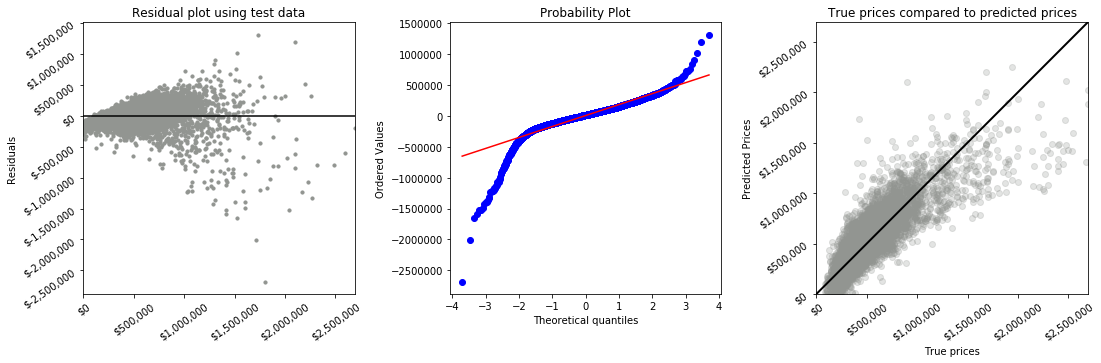

In [78]:
make_linear_model(X,y)

Using my custom function, we can see that the MAPE score using all features is __25.83%__.  This is our baseline that we will attempt to improve upon.  From the plots above, we can see that the residuals are not evenly distributed, which indicates some non-linear factors.  Also, the probability plot shows some skewedness on both ends. 

### Clustering
In order to minimize the MAPE, we'll first cluster the data before applying a model. We'll cluster the data only on the most impactful features, price, sqft_living, and grade.

In [79]:
from sklearn.cluster import KMeans

df_cluster = df[['price','sqft_living','grade']]

# initalize a KMeans instance and fit it to the dataframe
km = KMeans(n_clusters = 3, init = 'k-means++', n_init = 10)
km.fit(df_cluster)
x = km.fit_predict(df_cluster)

# create new column indicating which cluster the observation belongs to
df['cluster'] = x

# split dataframe based on clustering
# from doing the clustering many times, I determined that the clusters will be split into roughly 15,000, 6,000, and 600 
# observations.  To remain consistent, I'll assign them titles in the order of
# cluster 0 being the smallest group and cluster2 being the largest.

if len(df.loc[df.cluster == 0].index) < 1000:
    cluster0 = df.loc[df.cluster == 0]
elif len(df.loc[df.cluster == 1].index) < 1000:
    cluster0 = df.loc[df.cluster == 1]
elif len(df.loc[df.cluster == 2].index) < 1000:
    cluster0 = df.loc[df.cluster == 2]
    
if (len(df.loc[df.cluster == 0].index) > 1000) & (len(df.loc[df.cluster == 0].index) < 10000):
    cluster1 = df.loc[df.cluster == 0]
elif (len(df.loc[df.cluster == 1].index) > 1000) & (len(df.loc[df.cluster == 1].index) < 10000):
    cluster1 = df.loc[df.cluster == 1]   
elif (len(df.loc[df.cluster == 2].index) > 1000) & (len(df.loc[df.cluster == 2].index) < 10000):
    cluster1 = df.loc[df.cluster == 2]   
    
if len(df.loc[df.cluster == 0].index) > 10000:
    cluster2 = df.loc[df.cluster == 0]
elif len(df.loc[df.cluster == 1].index) > 10000:
    cluster2 = df.loc[df.cluster == 1]
elif len(df.loc[df.cluster == 2].index) > 10000:
    cluster2 = df.loc[df.cluster == 2]

print(cluster0.shape)
print(cluster1.shape)
print(cluster2.shape)

(604, 22)
(5914, 22)
(15095, 22)


### Visualizing the Clusters
We can see that the data is now clustered into three groups, of varied size.  Below is a look at the distribution of the prices of the clusters.

C:\Users\BradT\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


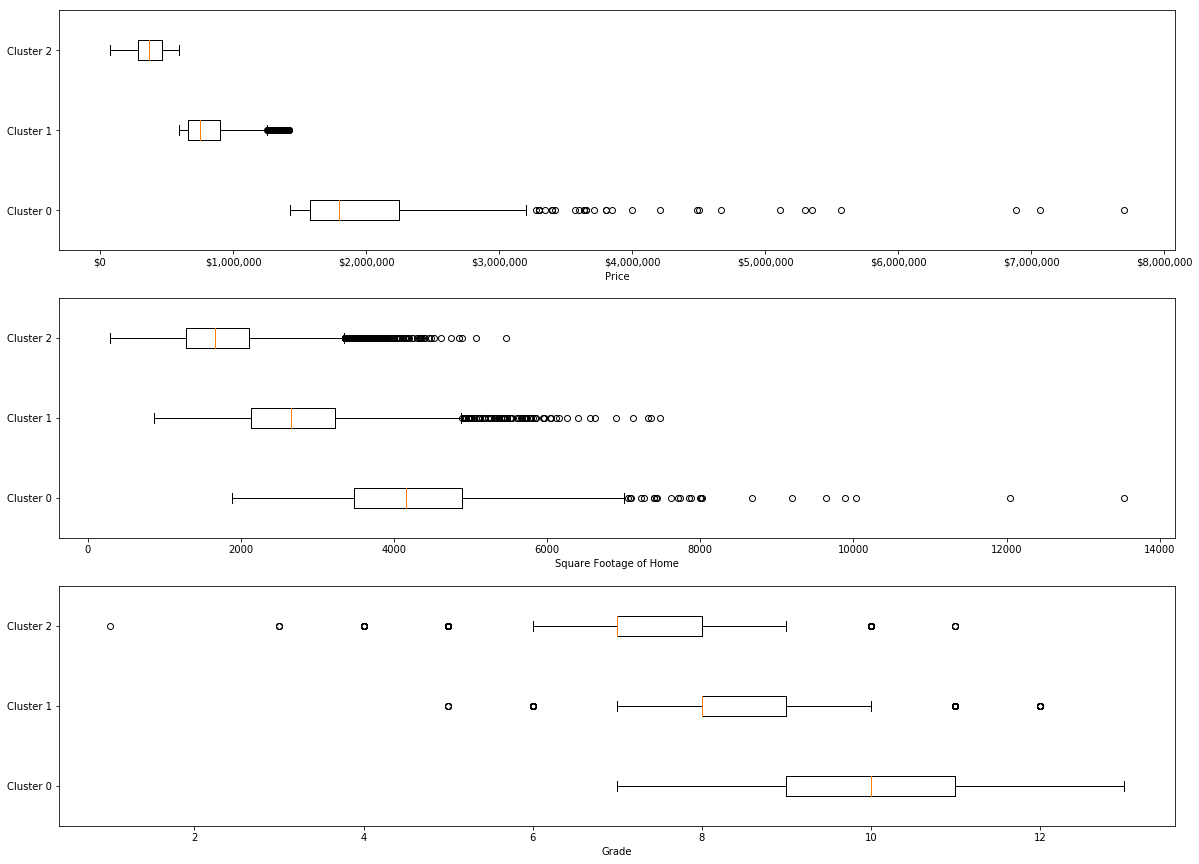

In [80]:
to_plot = [cluster0.price, cluster1.price, cluster2.price]

fig = plt.figure(figsize = (20,15))
ax = fig.add_subplot(3,1,1)
ax.set_xlabel("Price")
ax.xaxis.set_major_formatter(tick) 
plt.boxplot(to_plot, vert = False, widths = .25,labels = ['Cluster 0','Cluster 1','Cluster 2'])

to_plot = [cluster0.sqft_living, cluster1.sqft_living, cluster2.sqft_living]

ax2 = fig.add_subplot(3,1,2)
ax2.set_xlabel("Square Footage of Home")
plt.boxplot(to_plot, vert = False, widths = .25,labels = ['Cluster 0','Cluster 1','Cluster 2'])

to_plot = [cluster0.grade, cluster1.grade, cluster2.grade]

ax3 = fig.add_subplot(3,1,3)
ax3.set_xlabel("Grade")
plt.boxplot(to_plot, vert = False, widths = .25,labels = ['Cluster 0','Cluster 1','Cluster 2'])
plt.show()

Cluster 0, which has about 600 observations, seems to be a grouping of the higher priced homes.  The homes in this group tend to have higher square footage, and grade values as well. There are several outliers at the high end, but most prices fall between about $1.5 and 3 million.  

Cluster 1 has about 6,000 observations, and contains homes priced at about $500,000 to the lower bounds of Cluster 0. The square footage and grade are in the middle of clusters 0 and 2.

Cluster 2 has the most observations, with 15,000.  It's comprised of the lowest priced homes, with the smallest square footage, and mostly lower grades.  It makes sense that most homes in this cluster are sold for under a million dollars.

## Feature Encoding

In [81]:
def encode_feature(df, feature_name, num_buckets = 30):
    
    # create name for new feture, and copy the dataframe
    bucket = feature_name + '_bucket_interval'
    bucket_price = feature_name + '_bucket_price'
    df_copy = df.copy()
        
    # create a new feature that contains the interval to which the observation belongs
    df_copy[bucket] = pd.qcut(df[feature_name],num_buckets, duplicates = 'drop')
   
    # group the intervals together and calculate the mean price for each interval/bucket
    df_new = df_copy.groupby(df_copy[bucket], as_index = False).agg({'price':'mean'})
    df_new = pd.DataFrame(df_new)
    
    # specify the column names, and create a row that contains the number of the bucket for plotting
    df_new.rename(columns = {'price':bucket_price}, inplace = True)
    df_new['bucket_number'] = df_new.index + 1
    df_new.head()
    
    # show a scatter plot of the buckets
    fig, ax = plt.subplots(figsize = (8,6))
    plt.scatter(df_new.bucket_number,df_new[bucket_price])
    plt.xlabel('Bucket Number - ' + feature_name)
    plt.ylabel('Average price')
    ax.yaxis.set_major_formatter(tick) 
    plt.show()
    
    #join df and df_new on the new bucket_interval feature
    df_join = pd.merge(df_new, df_copy, on=bucket)
    df_join.drop([bucket, 'bucket_number'], axis = 1, inplace = True)
    return df_join

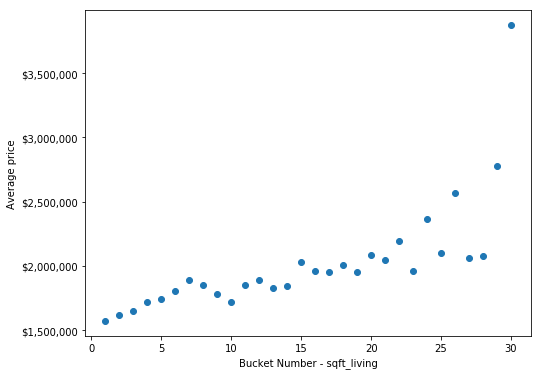

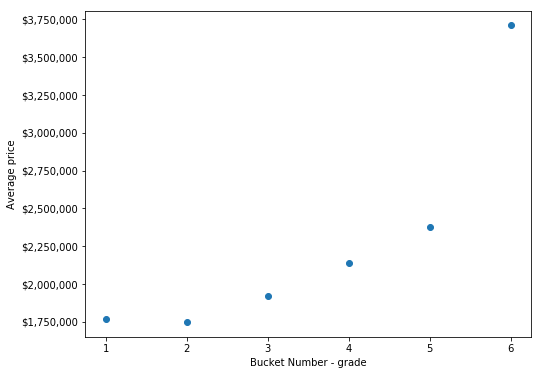

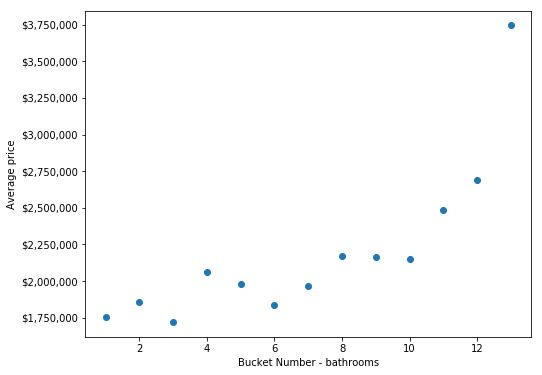

In [82]:
# create encoded features
cluster0 = encode_feature(cluster0,'sqft_living')
cluster0 = encode_feature(cluster0, 'grade')
cluster0 = encode_feature(cluster0, 'bathrooms')

From the graphs, the encoded features for sqft_living, grade, and bathrooms seem to have a quadratic relationship with price.  No other variables showed clear relationships after encoding.  In order to capture the quadratic relationship, we'll create new features by squaring the encoded value for each observation.  

In [83]:
cluster0['sqft_living_bucket_price_squared'] = cluster0['sqft_living_bucket_price'] ** 2
cluster0['grade_bucket_price_squared'] = cluster0['grade_bucket_price'] ** 2
cluster0['bathrooms_bucket_price_squared'] = cluster0['bathrooms_bucket_price'] ** 2

Before creating a model for Cluster 0, we will look at the top correlates to guide our feature selection.

In [84]:
# print the top ten correlates to price -  index 1-11 because index 0 is price itself, which has a correlation of 1.
print(cluster0.corr()['price'].sort_values(ascending = False)[1:11])

sqft_living_bucket_price            0.604338
sqft_living_bucket_price_squared    0.597871
sqft_living                         0.583050
bathrooms_bucket_price              0.485084
bathrooms_bucket_price_squared      0.480466
grade_bucket_price                  0.443361
sqft_above                          0.443350
grade_bucket_price_squared          0.438086
bathrooms                           0.437020
grade                               0.370254
Name: price, dtype: float64


                           Features  Estimated Coefficients
0  sqft_living_bucket_price_squared            1.298238e-07
1                        waterfront            5.954120e+05
2                         condition            6.721346e+04
3                             grade            6.211902e+04
4                       sqft_living            9.376187e+01

Estimated intercept coefficient: 135601.22614349728

Summary Statistics
R-squared value: 0.3651722230592157
Root Mean Squared Error: 534305.9167235789
Mean Absolute Percentage Error (MAPE): 18.801434341787772


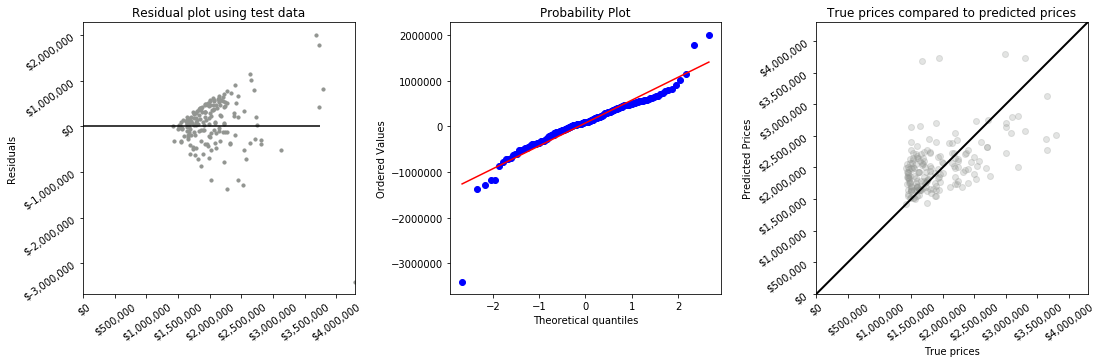

In [97]:
features = ['sqft_living_bucket_price_squared','waterfront','condition','grade', 'sqft_living']
X = cluster0[features]
y = cluster0.price

make_linear_model(X,y)

A MAPE score of __17.36%__ is a vast improvement over our original score of __25.85%__.  The distribution of the residuals is somewhat normal, but there are signs of skewedness at the edges as seen in the probability plot.  The table below describes all combination of features tested with their corresponding MAPE scores.

Features Used | MAPE
--- | ---
sqft_living_bucket_price_squared, waterfront, condition, grade, sqft_living | 17.360 <br>
sqft_living_bucket_price_squared, bathrooms, waterfront, condition, grade, sqft_living | 17.365 <br>
sqft_living_bucket_price_squared, bathrooms, waterfront, condition, grade, yr_built, sqft_living | 17.477<br>
sqft_living_bucket_price_squared, bathrooms, waterfront, condition, grade, yr_built, sqft_living, sqft_living15 | 17.506<br>
bathrooms_bucket_price, grade_bucket_price_squared,  sqft_living_bucket_price_squared, bathrooms, waterfront, condition, grade, yr_built, sqft_living, sqft_living15 | 17.686<br>
sqft_above, bathrooms_bucket_price, grade_bucket_price_squared, sqft_living_bucket_price_squared, bathrooms, waterfront, condition, grade, yr_built, sqft_living, sqft_living15 | 17.623<br>
sqft_above, bathrooms_bucket_price_squared, grade_bucket_price_squared, sqft_living_bucket_price_squared, bathrooms, waterfront, condition, grade, yr_built, sqft_living, sqft_living15 | 17.683<br>
bathrooms_bucket_price_squared, grade_bucket_price_squared, sqft_living_bucket_price_squared, bathrooms, waterfront, condition, grade, yr_built, sqft_living, sqft_living15 | 17.705<br>
grade_bucket_price_squared,  sqft_living_bucket_price_squared, bathrooms, waterfront, condition, grade, yr_built, sqft_living, sqft_living15 | 17.743<br>
sqft_living_bucket_price_squared, sqft_living, bathrooms_bucket_price, bathrooms, grade_bucket_price_squared, sqft_above, grade | 19.19<br>
waterfront, condition, grade, sqft_living | 18.986 <br>

To ensure the features we selected are statistically signifcant, we'll run a statsmodels linear regression and look at the P-values for each feature.  

In [87]:
est = sm.OLS(y, X)
fitted = est.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     2167.
Date:                Wed, 20 Jun 2018   Prob (F-statistic):               0.00
Time:                        11:51:19   Log-Likelihood:                -8838.7
No. Observations:                 604   AIC:                         1.769e+04
Df Residuals:                     600   BIC:                         1.770e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
waterfront   6.014e+05   6.59e+04      9.126      

The column labeled 'P>|t|' shows us that each of the features we selected are statistically significant influencers of price.  We can be satisfied with this model. 

# Cluster 1


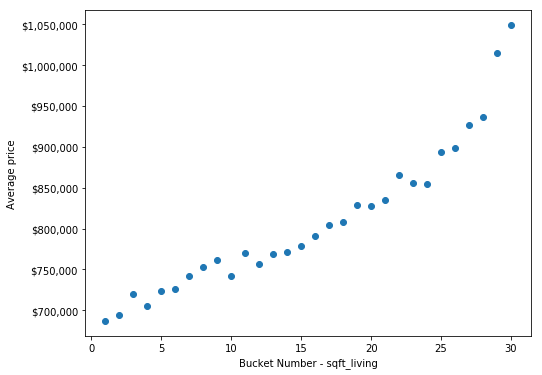

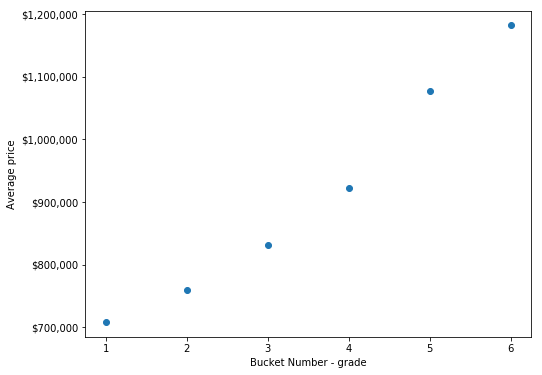

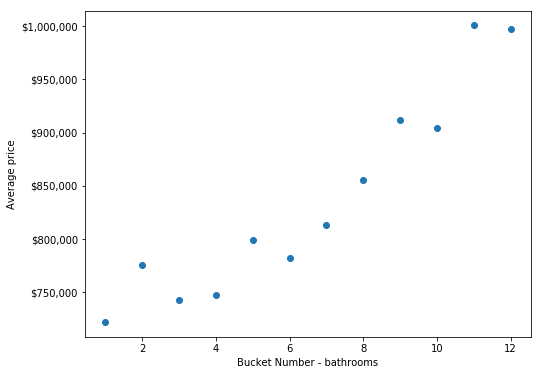

In [88]:
# create encoded features
cluster1 = encode_feature(cluster1,'sqft_living')
cluster1 = encode_feature(cluster1, 'grade')
cluster1 = encode_feature(cluster1, 'bathrooms')

From the graphs, the encoded features for sqft_living, grade, and bathrooms seem to have either a linear or a quadratic relationship with price.  No other variables showed clear relationships after encoding.  In order to capture the quadratic relationship, we'll create new features by squaring the encoded value for each observation.  

In [89]:
cluster1['sqft_living_bucket_price_squared'] = cluster1['sqft_living_bucket_price'] ** 2
cluster1['grade_bucket_price_squared'] = cluster1['grade_bucket_price'] ** 2
cluster1['bathrooms_bucket_price_squared'] = cluster1['bathrooms_bucket_price'] **2

Before creating a model for Cluster 1, we will look at the top correlates to guide our feature selection.

In [90]:
# print the top ten correlates to price -  index 1-11 because index 0 is price itself, which has a correlation of 1.
print(cluster1.corr()['price'].sort_values(ascending = False)[1:11])

sqft_living_bucket_price            0.464059
grade_bucket_price                  0.463207
sqft_living_bucket_price_squared    0.463101
grade_bucket_price_squared          0.461872
sqft_living                         0.457140
grade                               0.447504
sqft_living15                       0.360012
bathrooms_bucket_price              0.351453
bathrooms_bucket_price_squared      0.351063
sqft_above                          0.347146
Name: price, dtype: float64


                            Features  Estimated Coefficients
0             bathrooms_bucket_price            6.861509e-01
1                 grade_bucket_price            1.909589e-01
2   sqft_living_bucket_price_squared            1.010947e-07
3                          bathrooms           -4.130994e+04
4                         waterfront            2.174642e+05
5                          condition            1.539677e+04
6                              grade            5.032231e+04
7                           yr_built           -1.171170e+03
8                            zipcode           -6.998538e+02
9                                lat            2.160290e+05
10                              long           -5.230953e+05
11                       sqft_living            4.803126e+01
12                     sqft_living15            4.666981e+01

Estimated intercept coefficient: -3853781.7837947556

Summary Statistics
R-squared value: 0.4435217325064711
Root Mean Squared Error: 139169.0124

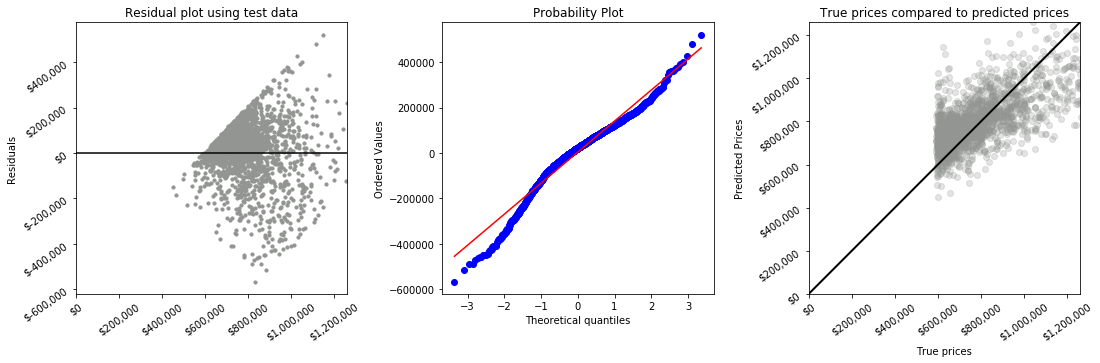

In [98]:
features = ['bathrooms_bucket_price', 'grade_bucket_price', 'sqft_living_bucket_price_squared', 'bathrooms', 'waterfront', 'condition', 'grade', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living', 'sqft_living15']
X = cluster1[features]
y = cluster1.price

make_linear_model(X,y)

A MAPE score of __13.116%__ is a vast improvement over our original score of __25.85%__.  The distribution of the residuals is troubling, but the diagonal pattern seen is caused by the clustering.  This cluster seems to have a strict cut-off point near $600,000.  This causes our probability plot to show a wave-like pattern.  Because this is caused by the clustering, I'm less concerned about it than I otherwise would be.  The table below describes all combination of features tested with their corresponding MAPE scores.

Features Used | MAPE
--- | ---
bathrooms_bucket_price, grade_bucket_price, sqft_living_bucket_price_squared, bathrooms, waterfront, condition, grade, yr_built, zipcode, lat, long, sqft_living, sqft_living15 | 13.116 <br>
bathrooms_bucket_price, grade_bucket_price_squared, sqft_living_bucket_price_squared, bathrooms, waterfront, condition, grade, yr_built, zipcode, lat, long, sqft_living, sqft_living15 | 13.120 <br>
bathrooms_bucket_price_squared, grade_bucket_price, bathrooms, waterfront, condition, grade, yr_built, zipcode, lat, long, sqft_living, sqft_living15 | 13.123 <br>
bathrooms_bucket_price_squared, grade_bucket_price, sqft_living_bucket_price_squared, bathrooms, waterfront, condition, grade, yr_built, zipcode, lat, long, sqft_living, sqft_living15 | 13.123 <br>
grade_bucket_price_squared, sqft_living_bucket_price_squared, bathrooms, waterfront, condition, grade, yr_built, zipcode, lat, long, sqft_living, sqft_living15 | 13.214 <br>
bathrooms, waterfront, condition, grade, yr_built, zipcode, lat, long, sqft_living, sqft_living15 | 13.248 <br>
bathrooms_bucket_price, grade_bucket_price_squared, sqft_living_bucket_price_squared, bathrooms, waterfront, condition, grade, yr_built, zipcode, lat, long, sqft_living | 13.270 <br>
bathrooms_bucket_price, grade_bucket_price_squared, sqft_living_bucket_price_squared, bathrooms, waterfront, condition, grade, yr_built, sqft_living, sqft_living15 | 13.941 <br>
bathrooms_bucket_price_squared, sqft_living, grade_bucket_price_squared, grade, sqft_above, bathrooms_bucket_price, bathrooms | 14.67 <br>

To ensure the features we selected are statistically signifcant, we'll run a statsmodels linear regression and look at the P-values for each feature.  

In [91]:
est = sm.OLS(y, X)
fitted = est.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     2167.
Date:                Wed, 20 Jun 2018   Prob (F-statistic):               0.00
Time:                        11:51:20   Log-Likelihood:                -8838.7
No. Observations:                 604   AIC:                         1.769e+04
Df Residuals:                     600   BIC:                         1.770e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
waterfront   6.014e+05   6.59e+04      9.126      

The column labeled 'P>|t|' shows us that each of the features we selected are statistically significant influencers of price, since they all fall below the arbitrary value of .05.  We can be satisfied with this model. 

# Cluster 2


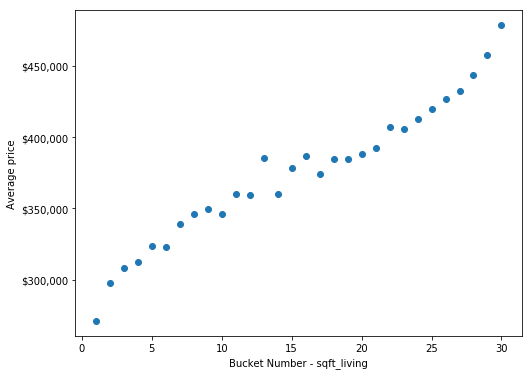

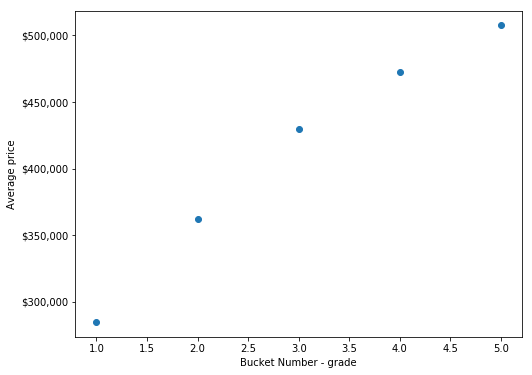

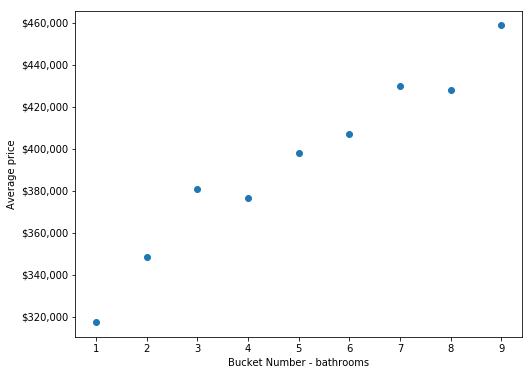

In [92]:
# encode features
cluster2 = encode_feature(cluster2,'sqft_living')
cluster2 = encode_feature(cluster2, 'grade')
cluster2 = encode_feature(cluster2, 'bathrooms')

From the graphs, the encoded features for sqft_living, grade, and bathrooms seem to have either a linear or a quadratic relationship with price.  Grade may be related by the root function.  No other variables showed clear relationships after encoding.  In order to capture the quadratic relationship, we'll create new features by squaring the encoded value for each observation.  

In [93]:
cluster2['sqft_living_bucket_price_squared'] = cluster2['sqft_living_bucket_price'] ** 2
cluster2['grade_bucket_price_sqrt'] = cluster2['grade_bucket_price'] ** .5

In [94]:
# print the top ten correlates to price -  index 1-11 because index 0 is price itself, which has a correlation of 1.
print(cluster2.corr()['price'].sort_values(ascending = False)[1:11])

lat                                 0.482462
grade                               0.451549
grade_bucket_price                  0.451176
grade_bucket_price_sqrt             0.450742
sqft_living_bucket_price            0.420648
sqft_living_bucket_price_squared    0.419266
sqft_living                         0.412204
sqft_living15                       0.369922
bathrooms_bucket_price              0.339196
bathrooms                           0.333041
Name: price, dtype: float64


                            Features  Estimated Coefficients
0                           bedrooms           -1.229909e+04
1            grade_bucket_price_sqrt            3.231988e+02
2   sqft_living_bucket_price_squared            7.410774e-07
3                          bathrooms            2.437804e+04
4                         waterfront            1.295705e+05
5                          condition            1.240750e+04
6                              grade            3.218932e+04
7                           yr_built           -8.241704e+02
8                            zipcode           -4.188423e+01
9                                lat            4.057994e+05
10                              long            3.945118e+04
11                       sqft_living            1.685261e+01

Estimated intercept coefficient: -8974715.60852908

Summary Statistics
R-squared value: 0.5664798337761238
Root Mean Squared Error: 75550.38559401885
Mean Absolute Percentage Error (MAPE): 17.92552110310580

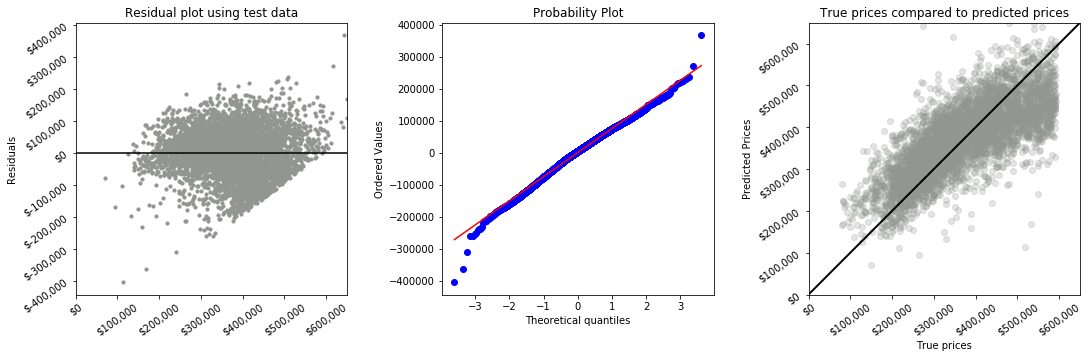

In [95]:
features = ['bedrooms', 'grade_bucket_price_sqrt', 'sqft_living_bucket_price_squared', 'bathrooms', 'waterfront', 'condition', 'grade', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living' ]
X = cluster2[features]
y = cluster2.price

make_linear_model(X,y)

A MAPE score of __17.913%__ is a vast improvement over our original score of __25.85%__.  The distribution of the residuals is normal, and as before, the diagonal pattern is caused by the clustering. The probability plot shows us that our residuals are normal. The table below describes all combination of features tested with their corresponding MAPE scores.

 Features Used | MAPE
--- | ---
grade_bucket_price, sqft_living_bucket_price, bedrooms, bathrooms, waterfront, condition, grade, yr_built, zipcode, lat, long, sqft_living | 17.913 <br>
bathrooms_bucket_price, grade_bucket_price, sqft_living_bucket_price, bedrooms, bathrooms, waterfront, condition, grade, yr_built, zipcode, lat, long, sqft_living | 17.913 <br>
bedrooms, grade_bucket_price_sqrt, sqft_living_bucket_price_squared, bathrooms, waterfront, condition, grade, yr_built, zipcode, lat, long, sqft_living |  17.926 <br>
bedrooms, grade_bucket_price, sqft_living_bucket_price_squared, bathrooms, waterfront, condition, grade, yr_built, zipcode, lat, long, sqft_living |  17.927 <br>
grade_bucket_price, sqft_living_bucket_price, bathrooms, waterfront, condition, grade, yr_built, zipcode, lat, long, sqft_living | 18.055 <br>
grade_bucket_price, sqft_living_bucket_price, bathrooms, waterfront, condition, grade, yr_built, lat, long, sqft_living, | 18.066 <br>
lat, grade_bucket_price_sqrt, grade, sqft_living_bucket_price_squared, sqft_living, sqft_above | 18.62 <br>


To ensure the features we selected are statistically signifcant, we'll run a statsmodels linear regression and look at the P-values for each feature.  

In [96]:
est = sm.OLS(y, X)
fitted = est.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     1777.
Date:                Wed, 20 Jun 2018   Prob (F-statistic):               0.00
Time:                        11:51:22   Log-Likelihood:            -1.9097e+05
No. Observations:               15095   AIC:                         3.820e+05
Df Residuals:                   15083   BIC:                         3.821e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
bedrooms

The column labeled 'P>|t|' shows us that each of the features we selected are statistically significant influencers of price, since they all fall below the arbitrary value of .05.  We can be satisfied with this model. 